In [1]:
import pandas as pd
import numpy as np

In [2]:
start_date = '2023-07-01'
end_date = '2023-07-23'
total_days_in_month = 31
days_data_having = np.array(int(end_date[-2:])).item()- np.array(int(start_date[-2:])).item() + 1

days_to_forecast = total_days_in_month - days_data_having

In [3]:
df= pd.read_csv("/kaggle/input/modak-problem/modaka- puranpoli problem.csv")

In [4]:
df.columns

Index(['Order No', 'Customer Name', 'Order created Date',
       'Order completed Date', 'Order status', 'Order Invoice Value',
       'Payment Method', 'Discount on MRP', 'Shipping', 'item_name', 'SKU',
       'Item Invoice Value', 'Shipping Invoice Value', 'item_product_id',
       'item_vairation_id', 'item_id', 'Website Qty', 'MRP', 'Coupon Code',
       'ideal_UoM', 'Pack of', 'Tally_UoM', 'Tally_Qty', 'Item_Unit_Rate_TV',
       'Discount_%', 'Item_Amount_Tv', 'Shipping_TV', 'Order_TV', 'GSTIN',
       'Place of supply', 'CGST', 'SGST', 'IGST', 'Order_IV', 'hasError',
       'diff', 'totalIV'],
      dtype='object')

In [5]:
df = df.loc[:,['Order created Date','Order No','item_name','Pack of']]

In [6]:
df.columns

Index(['Order created Date', 'Order No', 'item_name', 'Pack of'], dtype='object')

In [7]:
# # Create a bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='item_name', y='Pack of', data=df, ci=None)
# plt.title('Quantity of Items')
# plt.xlabel('Item Name')
# plt.ylabel('Quantity')

# # Adjust the x-axis labels rotation for better readability
# plt.xticks(rotation=90)

# plt.show()

In [8]:
# Calculate the quantity of each item
quantity_per_item = df.groupby('item_name')['Pack of'].sum()

print(quantity_per_item)

item_name
Besan Ladoo ( Pure Ghee ) - 350gms                             143.15
Bhajani Chakli - 400gms                                        498.00
Chivda - 400gms                                                294.80
Dink Ladoo - 300gms                                             76.20
Handmade Puranpoli - 10 pieces                                3380.00
Handmade Puranpoli - 5 pieces                                 9940.00
Handmade Ukadiche Modak - 10 pieces                           2010.00
Handmade Ukadiche Modak - 5 pieces                            2765.00
Kachori - 400gms                                               119.60
Makhana - Himalayan Salt - 180 gms, Himalayan Salt               4.86
Makhana - Himalayan Salt - 60 gms, Himalayan Salt                5.70
Methi Ladoo ( Pure Ghee ) - 300gms                              71.40
Nachni Ladoo ( Pure Ghee ) - 350gms                             58.80
Panjeeri Ladoo - 300gms                                         18.60
Protein La

In [9]:
df.iloc[:,0]

0       2023-07-07T10:53:54
1       2023-07-07T17:06:16
2       2023-07-07T10:30:56
3       2023-07-07T10:30:56
4       2023-07-07T10:30:56
               ...         
8028    2023-07-20T23:53:59
8029    2023-07-20T12:20:10
8030    2023-07-20T12:20:10
8031    2023-07-20T12:20:10
8032    2023-07-20T13:58:46
Name: Order created Date, Length: 8033, dtype: object

In [10]:
from datetime import datetime 
# Define a function to convert datetime string to datetime object
def convert_to_datetime(datetime_string):
    return datetime.strptime(datetime_string, '%Y-%m-%dT%H:%M:%S')

# Apply the conversion function to the "Order Created Date and Time" column
df['Order created Date'] = df['Order created Date'].apply(convert_to_datetime)


In [11]:
df.iloc[:,0]

0      2023-07-07 10:53:54
1      2023-07-07 17:06:16
2      2023-07-07 10:30:56
3      2023-07-07 10:30:56
4      2023-07-07 10:30:56
               ...        
8028   2023-07-20 23:53:59
8029   2023-07-20 12:20:10
8030   2023-07-20 12:20:10
8031   2023-07-20 12:20:10
8032   2023-07-20 13:58:46
Name: Order created Date, Length: 8033, dtype: datetime64[ns]

In [12]:
# Calculate the quantity of each item per day
quantity_per_item_per_day = df.groupby(['Order created Date', 'item_name'])['Pack of'].sum()

print(quantity_per_item_per_day)

Order created Date   item_name                                                 
2023-07-01 00:06:05  Handmade Puranpoli - 10 pieces                                10.00
2023-07-01 00:06:18  Chivda - 400gms                                                0.40
2023-07-01 00:15:41  Handmade Puranpoli - 5 pieces                                  5.00
                     Kachori - 400gms                                               0.40
                     Protein Ladoo (Sugarfree, Gluten Free & Oil free) - 300gms     0.30
                                                                                   ...  
2023-07-23 23:25:42  Bhajani Chakli - 400gms                                        0.40
                     Chivda - 400gms                                                0.40
                     Handmade Puranpoli - 5 pieces                                  5.00
                     Makhana - Himalayan Salt - 60 gms, Himalayan Salt              0.06
2023-07-23 23:32:01  Handmade 

In [13]:
# # Filter the DataFrame to include only item names containing 'modak'
# filtered_df = df[df['item_name'].str.contains('modak', case=False)]

# # Calculate the total quantity for each date
# total_quantity_per_day = filtered_df.groupby('Order created Date')['Pack of'].sum().cumsum()

# print(total_quantity_per_day)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
df.iloc[:,0]

0      2023-07-07 10:53:54
1      2023-07-07 17:06:16
2      2023-07-07 10:30:56
3      2023-07-07 10:30:56
4      2023-07-07 10:30:56
               ...        
8028   2023-07-20 23:53:59
8029   2023-07-20 12:20:10
8030   2023-07-20 12:20:10
8031   2023-07-20 12:20:10
8032   2023-07-20 13:58:46
Name: Order created Date, Length: 8033, dtype: datetime64[ns]

In [16]:
# Sort the DataFrame by 'Order created Date'
df.sort_values(by='Order created Date', inplace=True)

# Group by 'Order created Date' and 'item_name', then sum the 'Pack of' column
quantity_per_day_per_product = df.groupby([df['Order created Date'].dt.date, 'item_name'])['Pack of'].sum()

print(quantity_per_day_per_product)

Order created Date  item_name                                                 
2023-07-01          Besan Ladoo ( Pure Ghee ) - 350gms                              5.95
                    Bhajani Chakli - 400gms                                        22.40
                    Chivda - 400gms                                                12.40
                    Dink Ladoo - 300gms                                             3.60
                    Handmade Puranpoli - 10 pieces                                240.00
                                                                                   ...  
2023-07-23          Nachni Ladoo ( Pure Ghee ) - 350gms                             4.20
                    Panjeeri Ladoo - 300gms                                         1.50
                    Protein Ladoo (Sugarfree, Gluten Free & Oil free) - 300gms      3.30
                    Rava Ladoo - 350gms                                             0.35
                    Shankarpali

In [18]:
import seaborn as sns


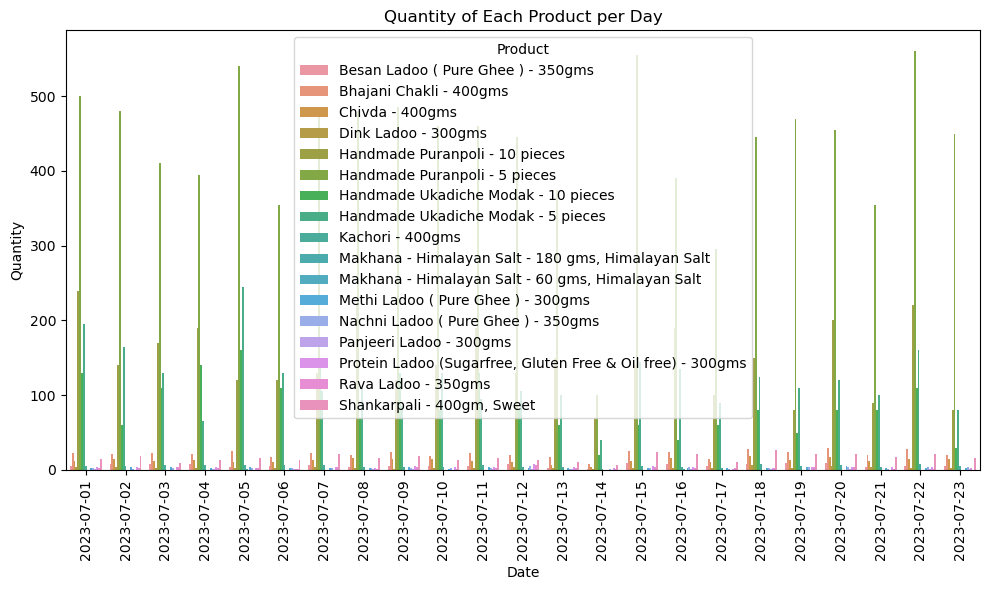

In [19]:
# Sort the DataFrame by 'Order created Date'
df.sort_values(by='Order created Date', inplace=True)

# Group by 'Order created Date' and 'item_name', then sum the 'Pack of' column
quantity_per_day_per_product = df.groupby([df['Order created Date'].dt.date, 'item_name'])['Pack of'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Order created Date', y='Pack of', hue='item_name', data=quantity_per_day_per_product)
plt.title('Quantity of Each Product per Day')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

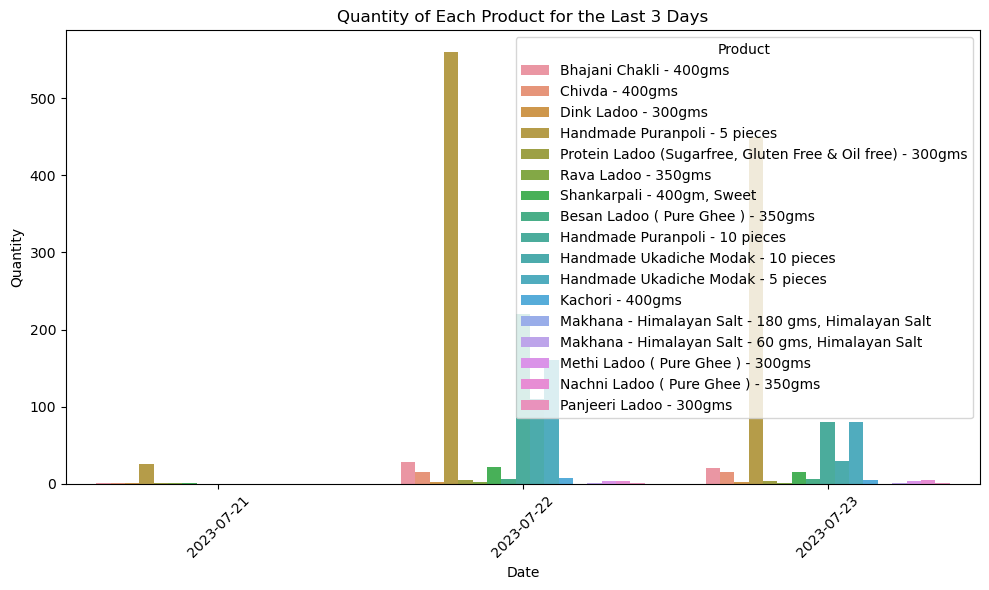

In [20]:
# Filter data for the last 3 days
last_3_days = df[df['Order created Date'] >= df['Order created Date'].max() - pd.Timedelta(days=2)]

# Group by 'Order created Date' and 'item_name', then sum the 'Pack of' column
quantity_per_day_per_product = last_3_days.groupby([last_3_days['Order created Date'].dt.date, 'item_name'])['Pack of'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Order created Date', y='Pack of', hue='item_name', data=quantity_per_day_per_product)
plt.title('Quantity of Each Product for the Last 3 Days')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.tight_layout()
plt.show()



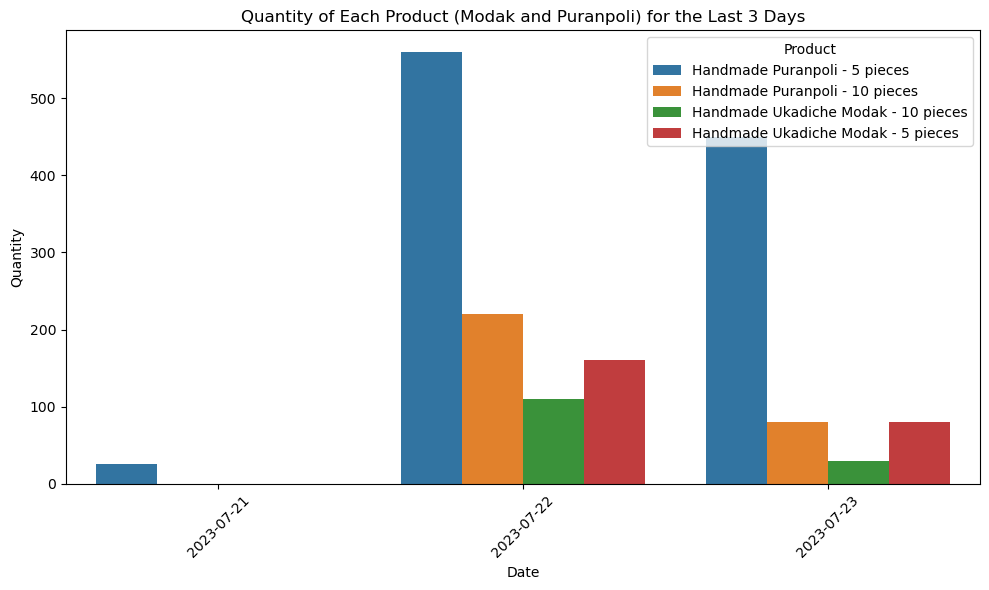

In [21]:
# Filter data for the last 3 days
last_3_days = df[df['Order created Date'] >= df['Order created Date'].max() - pd.Timedelta(days=2)]

# Filter only item names containing 'Modak' or 'Puranpoli'
filtered_last_3_days = last_3_days[last_3_days['item_name'].str.contains('Modak|Puranpoli', case=False)]

# Group by 'Order created Date' and 'item_name', then sum the 'Pack of' column
quantity_per_day_per_product = filtered_last_3_days.groupby([filtered_last_3_days['Order created Date'].dt.date, 'item_name'])['Pack of'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Order created Date', y='Pack of', hue='item_name', data=quantity_per_day_per_product)
plt.title('Quantity of Each Product (Modak and Puranpoli) for the Last 3 Days')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

In [22]:
# Filter only item names containing 'Modak' or 'Puranpoli'
filtered_df = df[df['item_name'].str.contains('Modak|Puranpoli', case=False)]

# Group by 'Order created Date' and 'item_name', then sum the 'Pack of' column to get quantity per day
quantity_per_day_per_product = filtered_df.groupby([filtered_df['Order created Date'].dt.date, 'item_name'])['Pack of'].sum().reset_index()

# Set 'Order created Date' as the index
quantity_per_day_per_product.set_index('Order created Date', inplace=True)

# Get unique item names for forecasting
unique_item_names = quantity_per_day_per_product['item_name'].unique()

# Perform forecasting for each item
forecasts = {}
for item_name in unique_item_names:
    item_data = quantity_per_day_per_product[quantity_per_day_per_product['item_name'] == item_name]['Pack of']
    model = ARIMA(item_data, order=(1, 1, 1))  # Replace (1, 1, 1) with appropriate order based on data characteristics
    results = model.fit()
    forecast = results.forecast(steps=1)
    forecasts[item_name] = forecast[0]

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [23]:
print("Forecasts for the next day:")
print(forecasts)

Forecasts for the next day:
{'Handmade Puranpoli - 10 pieces': 174.5135306000231, 'Handmade Puranpoli - 5 pieces': 428.98463629470643, 'Handmade Ukadiche Modak - 10 pieces': 73.92365268275574, 'Handmade Ukadiche Modak - 5 pieces': 122.43990712624105}


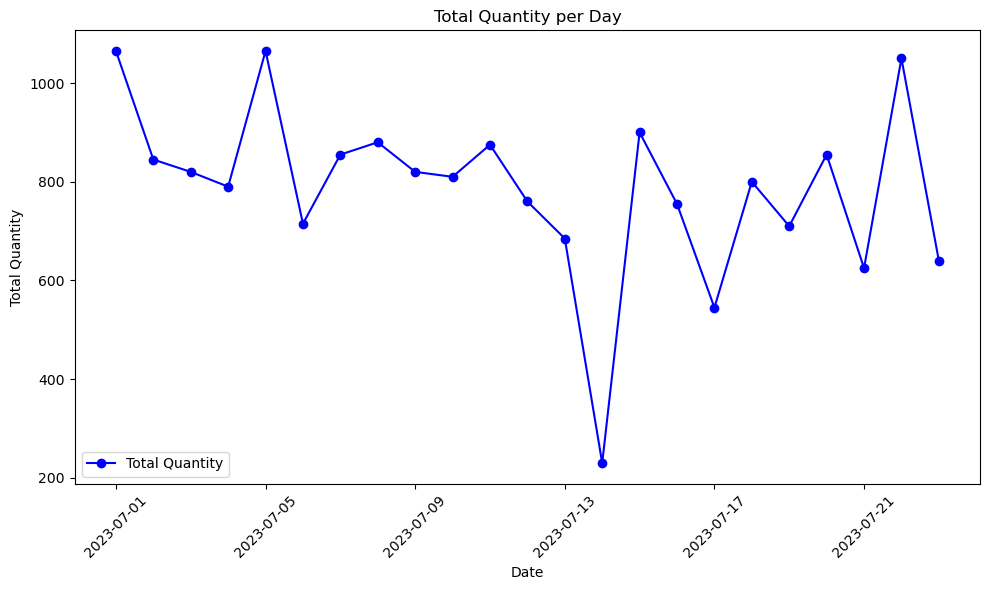

In [24]:
total_quantity_per_day = quantity_per_day_per_product.groupby(level=0)['Pack of'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_quantity_per_day.index, total_quantity_per_day.values, marker='o', label='Total Quantity', color='blue')
plt.title('Total Quantity per Day')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


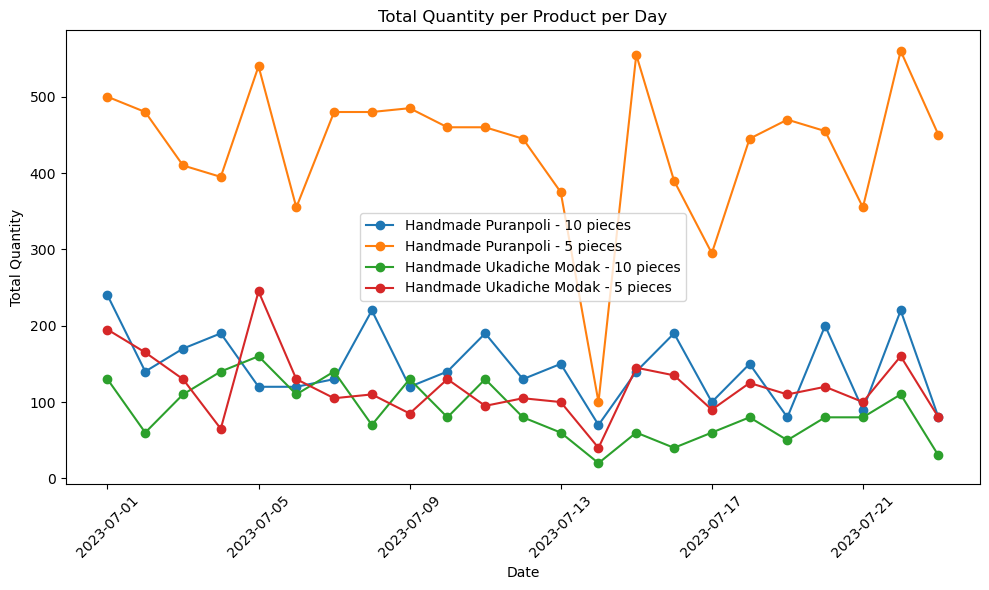

In [25]:
# Create a plot for total quantity per product for all days
plt.figure(figsize=(10, 6))
for item_name in quantity_per_day_per_product['item_name'].unique():
    total_quantity_per_product = quantity_per_day_per_product[quantity_per_day_per_product['item_name'] == item_name].groupby(level=0)['Pack of'].sum()
    plt.plot(total_quantity_per_product.index, total_quantity_per_product.values, marker='o', label=item_name)

plt.title('Total Quantity per Product per Day')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

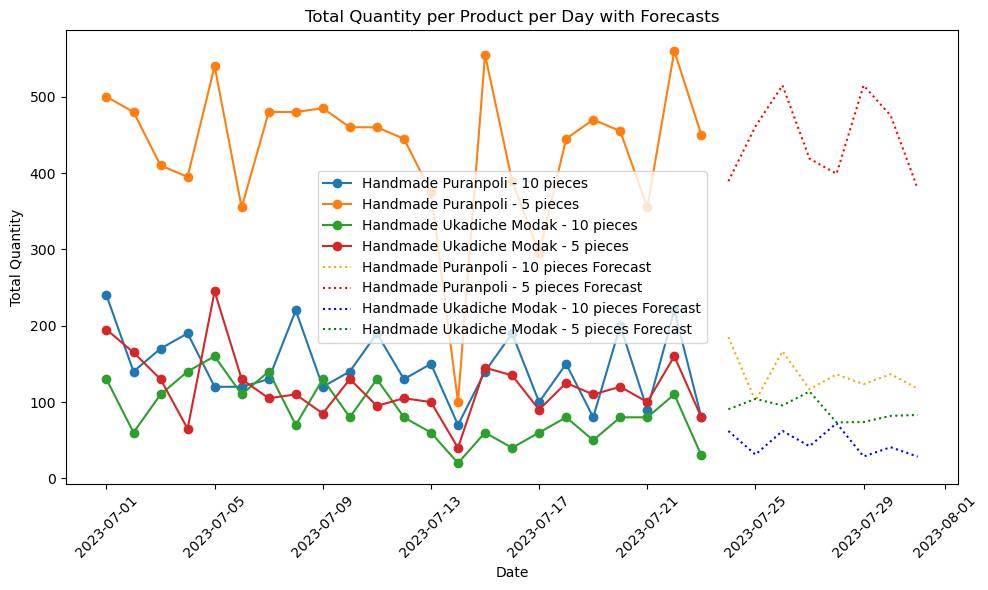

In [26]:
# Create a plot for total quantity per product for all days
plt.figure(figsize=(10, 6))
for item_name in quantity_per_day_per_product['item_name'].unique():
    total_quantity_per_product = quantity_per_day_per_product[quantity_per_day_per_product['item_name'] == item_name].groupby(level=0)['Pack of'].sum()
    plt.plot(total_quantity_per_product.index, total_quantity_per_product.values, marker='o', label=item_name)

# Perform forecasting for each item
forecasts = {}
colors = ['orange','red', 'blue', 'green']  # Add more colors if you have more items
for idx, item_name in enumerate(quantity_per_day_per_product['item_name'].unique()):
    item_data = quantity_per_day_per_product[quantity_per_day_per_product['item_name'] == item_name]['Pack of']
    model = ARIMA(item_data, order=(5, 2, 3))  # Replace (1, 1, 1) with appropriate order based on data characteristics
    results = model.fit()
    forecast = results.forecast(steps=days_to_forecast)  # Forecast for 8 days
    forecasts[item_name] = forecast

    # Create a plot for forecasted quantities for the next 8 days (dotted line)
    plt.plot(pd.date_range(start=quantity_per_day_per_product.index[-1] + pd.Timedelta(days=1), periods=8, freq='D'), forecast,
             linestyle='dotted', color=colors[idx], label=f'{item_name} Forecast')

plt.title('Total Quantity per Product per Day with Forecasts')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Print the forecasts for the next 5 days in intervals of 5
for item_name, forecast in forecasts.items():
    print(f"Forecast for {item_name} for the next days:")
    for i, value in enumerate(forecast):
        print(f"Day {i + 1}: {value:.2f}")
    print("\n")
# This code will perform forecasting for the quantities of 'Modak' and 'Puranpoli' for the next 5 days and print the forecasted quantities for each item in intervals of 5 days. Replace the data variable with your actual DataFrame to get the correct forecasts.







Forecast for Handmade Puranpoli - 10 pieces for the next days:
Day 1: 185.11
Day 2: 101.49
Day 3: 166.59
Day 4: 116.92
Day 5: 136.25
Day 6: 123.46
Day 7: 136.60
Day 8: 117.64


Forecast for Handmade Puranpoli - 5 pieces for the next days:
Day 1: 389.34
Day 2: 461.14
Day 3: 514.95
Day 4: 418.90
Day 5: 399.06
Day 6: 514.91
Day 7: 475.36
Day 8: 379.74


Forecast for Handmade Ukadiche Modak - 10 pieces for the next days:
Day 1: 62.08
Day 2: 31.18
Day 3: 62.13
Day 4: 42.19
Day 5: 72.24
Day 6: 28.70
Day 7: 40.82
Day 8: 28.50


Forecast for Handmade Ukadiche Modak - 5 pieces for the next days:
Day 1: 90.56
Day 2: 104.15
Day 3: 95.58
Day 4: 113.80
Day 5: 73.33
Day 6: 73.80
Day 7: 81.90
Day 8: 83.08


